First few rows of the dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0            

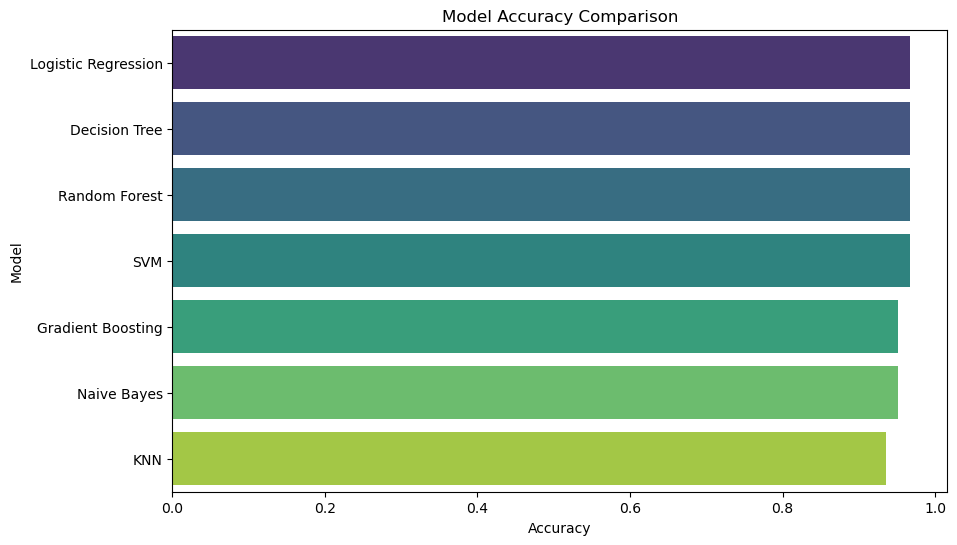

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "E:\VS Code\Practice\survey lung cancer.csv"
df = pd.read_csv(file_path)
print("First few rows of the dataset:")
print(df.head())

# Encode categorical variables
label_encoder = LabelEncoder()
df["GENDER"] = label_encoder.fit_transform(df["GENDER"])  # M=1, F=0
df["LUNG_CANCER"] = label_encoder.fit_transform(df["LUNG_CANCER"])  # YES=1, NO=0

# Features and target
X = df.drop(columns=["LUNG_CANCER"])
y = df["LUNG_CANCER"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features (AGE)
scaler = StandardScaler()
X_train["AGE"] = scaler.fit_transform(X_train[["AGE"]])
X_test["AGE"] = scaler.transform(X_test[["AGE"]])

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)
    results[model_name] = accuracy

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

# Print the final results
print("\nModel Accuracies:")
print(results_df)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()


In [4]:
import pickle

# Save the best model (Random Forest in this case)
best_model = models["Random Forest"]
pickle.dump(best_model, open("lung_cancer_model.pkl", "wb"))
print("Model saved as lung_cancer_model.pkl")


Model saved as lung_cancer_model.pkl
